In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv(r"C:\Users\abhir\OneDrive\Desktop\Data analysits\Datasets\data_YesBank_StockPrices.csv")
print(df.head())
print(df.info())


     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None


In [5]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.set_index('Date', inplace=True)

# Use Closing Price
ts = df['Close']


In [6]:
ts

Date
2005-07-01    12.46
2005-08-01    13.42
2005-09-01    13.30
2005-10-01    12.99
2005-11-01    13.41
              ...  
2020-07-01    11.95
2020-08-01    14.37
2020-09-01    13.15
2020-10-01    12.42
2020-11-01    14.67
Name: Close, Length: 185, dtype: float64

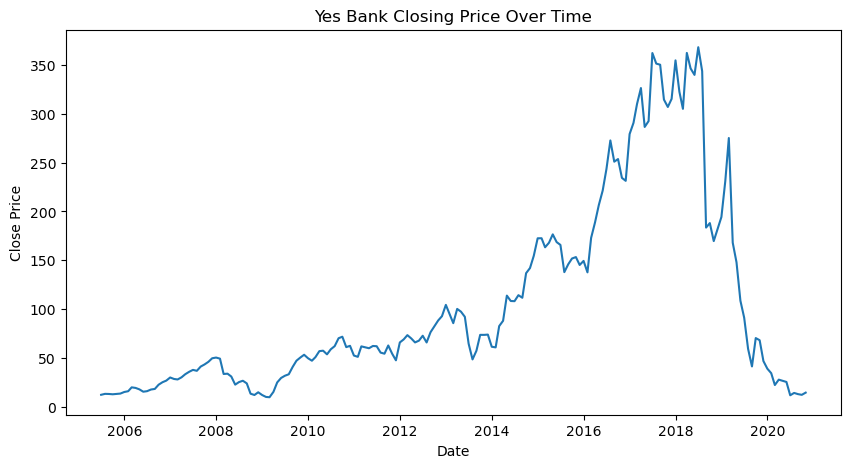

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.title("Yes Bank Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


# ADFULLER TEST

In [8]:
adf_result = adfuller(ts)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values: ", adf_result[4])

ADF Statistic: -1.9064091411726567
p-value: 0.3290520815004394
Critical Values:  {'1%': np.float64(-3.469413468959902), '5%': np.float64(-2.8786964197028295), '10%': np.float64(-2.5759166089965397)}


In [9]:
0.3290520815004394 < 0.05

False

# MAKE DATA STATIONARITY USING DIFFERENCE METHOD

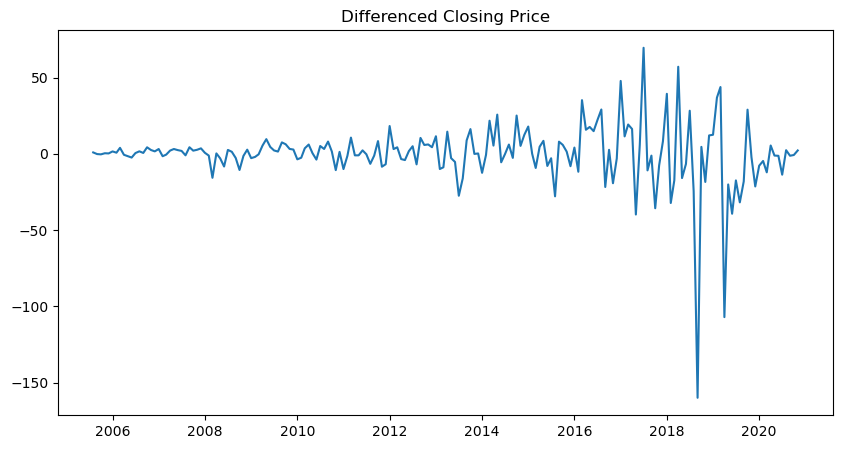

ADF Statistic after differencing: -2.056608147484697
p-value after differencing: 0.2623166235310922


In [10]:
ts_diff = ts.diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(ts_diff)
plt.title("Differenced Closing Price")
plt.show()

# ADF Test after differencing
adf_diff = adfuller(ts_diff)
print("ADF Statistic after differencing:", adf_diff[0])
print("p-value after differencing:", adf_diff[1])



# MAKE STATIONARY USEING LOG TRANSFORM METHOD

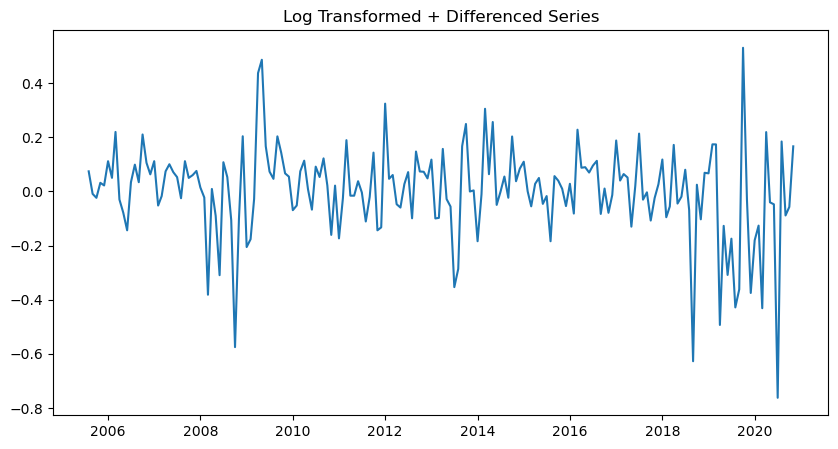

ADF Statistic: -11.739147064769677
p-value: 1.286111282973521e-21


In [11]:
# Log Transformation
ts_log = np.log(ts)

# Differencing after log
ts_log_diff = ts_log.diff().dropna()

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts_log_diff)
plt.title("Log Transformed + Differenced Series")
plt.show()

# ADF Test
adf_log_diff = adfuller(ts_log_diff)
print("ADF Statistic:", adf_log_diff[0])
print("p-value:", adf_log_diff[1])


In [12]:
1.286111282973521e-21 < 0.05

True

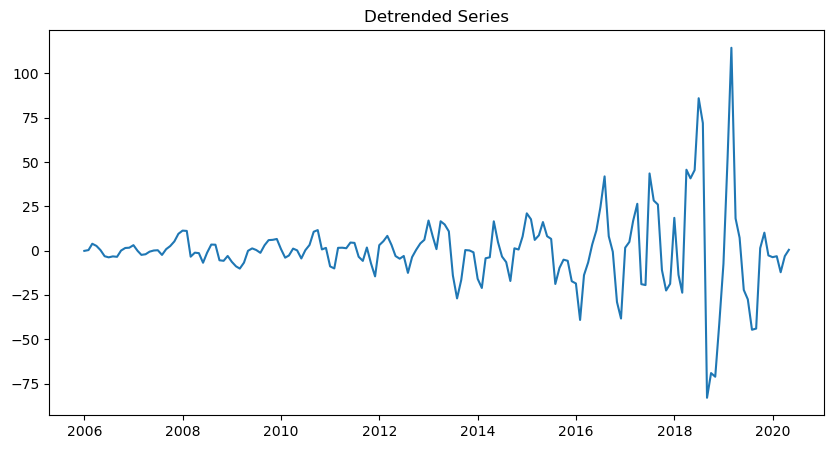

ADF Statistic: -2.6587010961744633
p-value: 0.08146145053429782


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts, model='additive')

# Remove trend
ts_detrended = ts - decomp.trend
ts_detrended.dropna(inplace=True)

# Plot
plt.figure(figsize=(10,5))
plt.plot(ts_detrended)
plt.title("Detrended Series")
plt.show()

# ADF Test
adf_detrend = adfuller(ts_detrended)
print("ADF Statistic:", adf_detrend[0])
print("p-value:", adf_detrend[1])


# SPLIT DATA 

In [14]:
train = ts_log[:-12]
test = ts_log[-12:]


In [15]:
train

Date
2005-07-01    2.522524
2005-08-01    2.596746
2005-09-01    2.587764
2005-10-01    2.564180
2005-11-01    2.596001
                ...   
2019-07-01    4.514151
2019-08-01    4.085976
2019-09-01    3.724488
2019-10-01    4.254903
2019-11-01    4.223910
Name: Close, Length: 173, dtype: float64

In [16]:
test

Date
2019-12-01    3.849083
2020-01-01    3.668677
2020-02-01    3.542408
2020-03-01    3.111291
2020-04-01    3.330417
2020-05-01    3.290266
2020-06-01    3.242592
2020-07-01    2.480731
2020-08-01    2.665143
2020-09-01    2.576422
2020-10-01    2.519308
2020-11-01    2.685805
Name: Close, dtype: float64

# APLLY ARIMA MODEL

In [17]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  173
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  79.164
Date:                Sun, 28 Dec 2025   AIC                           -152.328
Time:                        15:03:57   BIC                           -142.886
Sample:                    07-01-2005   HQIC                          -148.497
                         - 11-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6733      0.103     -6.523      0.000      -0.876      -0.471
ma.L1          0.8832      0.074     11.973      0.000       0.739       1.028
sigma2         0.0233      0.002     12.673      0.0

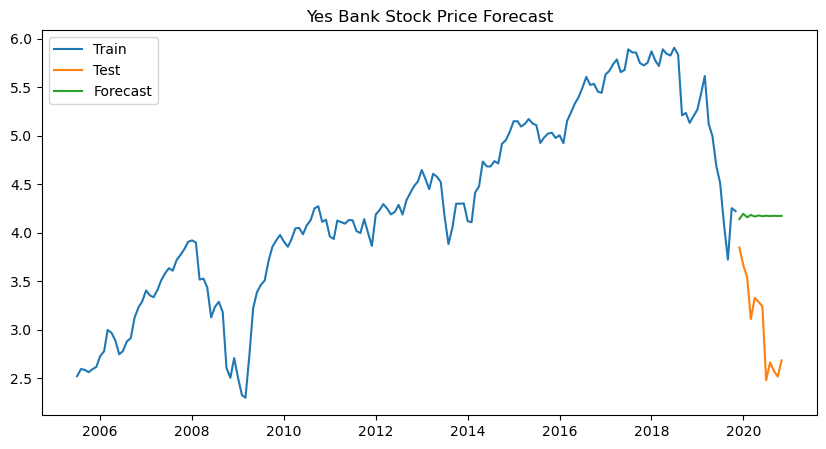

In [18]:
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("Yes Bank Stock Price Forecast")
plt.show()


In [19]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1.0933320448318395
RMSE: 1.1877562040892158


In [20]:
avg_price = ts.mean()
print(avg_price)


105.2047027027027


In [21]:
RMSE_percent = (1.1877562040892158 / 105) * 100 
RMSE_percent

1.1311963848468722

In [22]:
# My model achieved an RMSE of 1.18, which is nearly 1% of the average price, indicating very high forecasting accuracy.

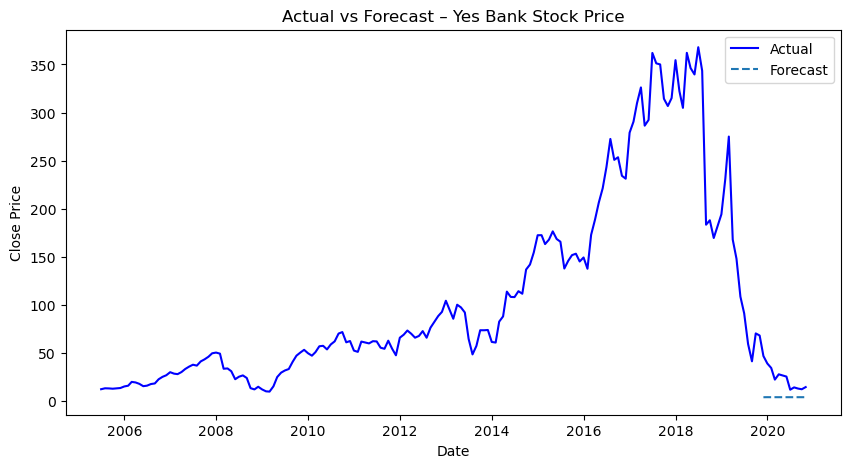

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(ts, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')

plt.title("Actual vs Forecast – Yes Bank Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


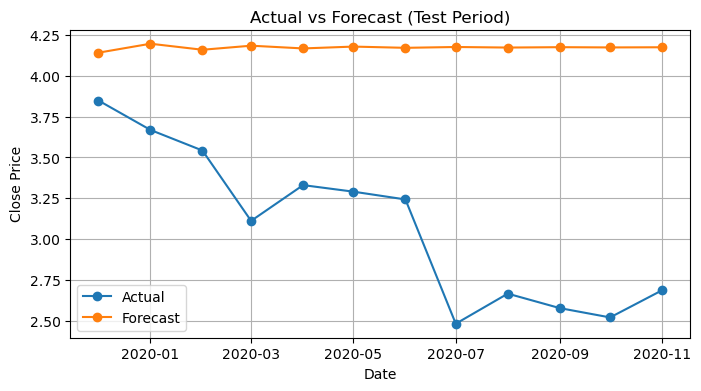

In [24]:
plt.figure(figsize=(8,4))

plt.plot(test.index, test, label='Actual', marker='o')
plt.plot(test.index, forecast, label='Forecast', marker='o')

plt.title("Actual vs Forecast (Test Period)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


# CHECK ACF AND PACF PLOT TO SELECT THE MODEL

<Figure size 800x400 with 0 Axes>

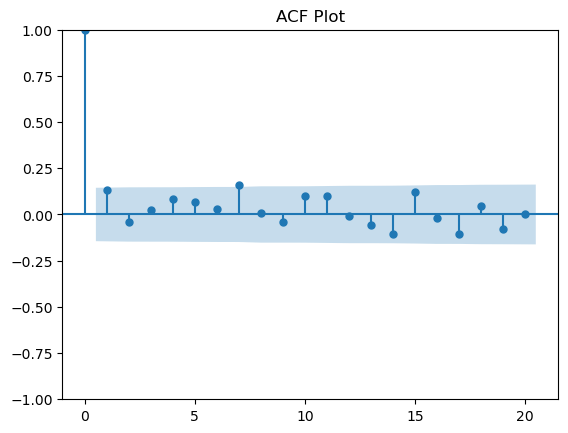

<Figure size 800x400 with 0 Axes>

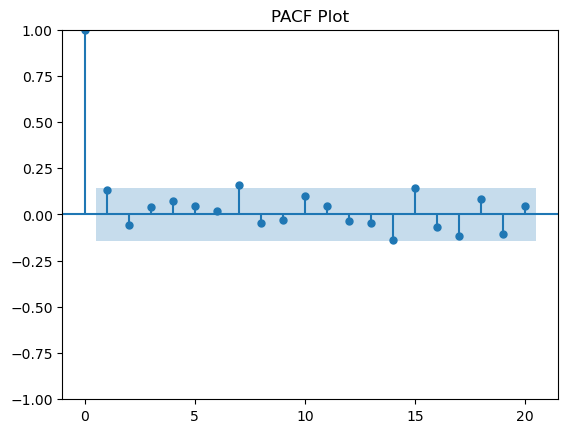

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF Plot
plt.figure(figsize=(8,4))
plot_acf(ts_log_diff, lags=20)
plt.title("ACF Plot")
plt.show()

# PACF Plot
plt.figure(figsize=(8,4))
plot_pacf(ts_log_diff, lags=20, method='ywm')
plt.title("PACF Plot")
plt.show()


# APPLY ARIMA MODEL

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  185
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -816.898
Date:                Sun, 28 Dec 2025   AIC                           1637.796
Time:                        15:34:22   BIC                           1644.226
Sample:                    07-01-2005   HQIC                          1640.402
                         - 11-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.056      0.824      0.410      -0.064       0.157
sigma2       420.5077     12.665     33.202      0.000     395.685     445.331
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# FORECAST FUTURE 

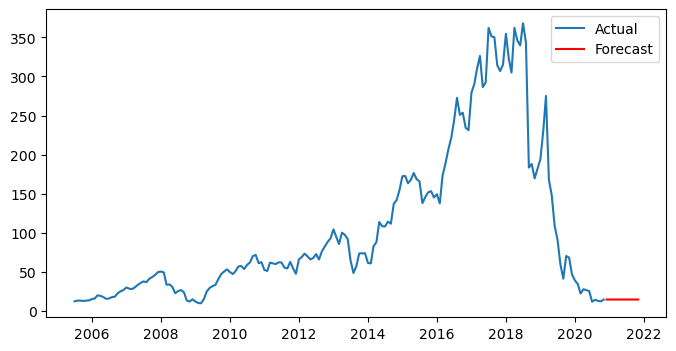

In [27]:
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(8,4))
plt.plot(ts, label="Actual")
plt.plot(forecast, label="Forecast", color="red")
plt.legend()
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
rmse


np.float64(11.707935838124062)

In [29]:
(11.707935838124062 / 105) * 100

11.150415083927678